# **Linear Regression, Lasso and SVM**

In [ ]:
import pandas as pd
import numpy as np
# To import the modules
from IPython.display import display
import matplotlib.pyplot as plt #for data visualization
import pandas as pd #For data related tasks
import numpy as np
from sklearn.linear_model import LinearRegression
import random

In [ ]:
# To get the data
dict = pd.read_csv("AAPL.csv")
data = pd.DataFrame(dict)

# To set the date column as an index
data = data.set_index('Date')

# To set the index into datetime
data = data.set_index(pd.DatetimeIndex(data.index.values))
data.head()

df = data
data = data.tail(120)

# To store the data
actual_price = data.tail(1)

# To get all the data except the last row
data = data.head(len(data)-1)

display(data)

,Open,High,Low,Close,Adj Close,Volume
2021-06-03,124.680000,124.849998,123.129997,123.540001,123.175415,76229200
2021-06-04,124.070000,126.160004,123.849998,125.889999,125.518478,75169300
2021-06-07,126.169998,126.320000,124.830002,125.900002,125.528450,71057600
2021-06-08,126.599998,128.460007,126.209999,126.739998,126.365967,74403800
2021-06-09,127.209999,127.750000,126.519997,127.129997,126.754814,56877900
...,...,...,...,...,...,...
2021-11-12,148.429993,150.399994,147.479996,149.990005,149.990005,63632600
2021-11-15,150.369995,151.880005,149.429993,150.000000,150.000000,59222800
2021-11-16,149.940002,151.490005,149.339996,151.000000,151.000000,59256200
2021-11-17,151.000000,155.000000,150.990005,153.490005,153.490005,88807000


# **To show the stock prices**

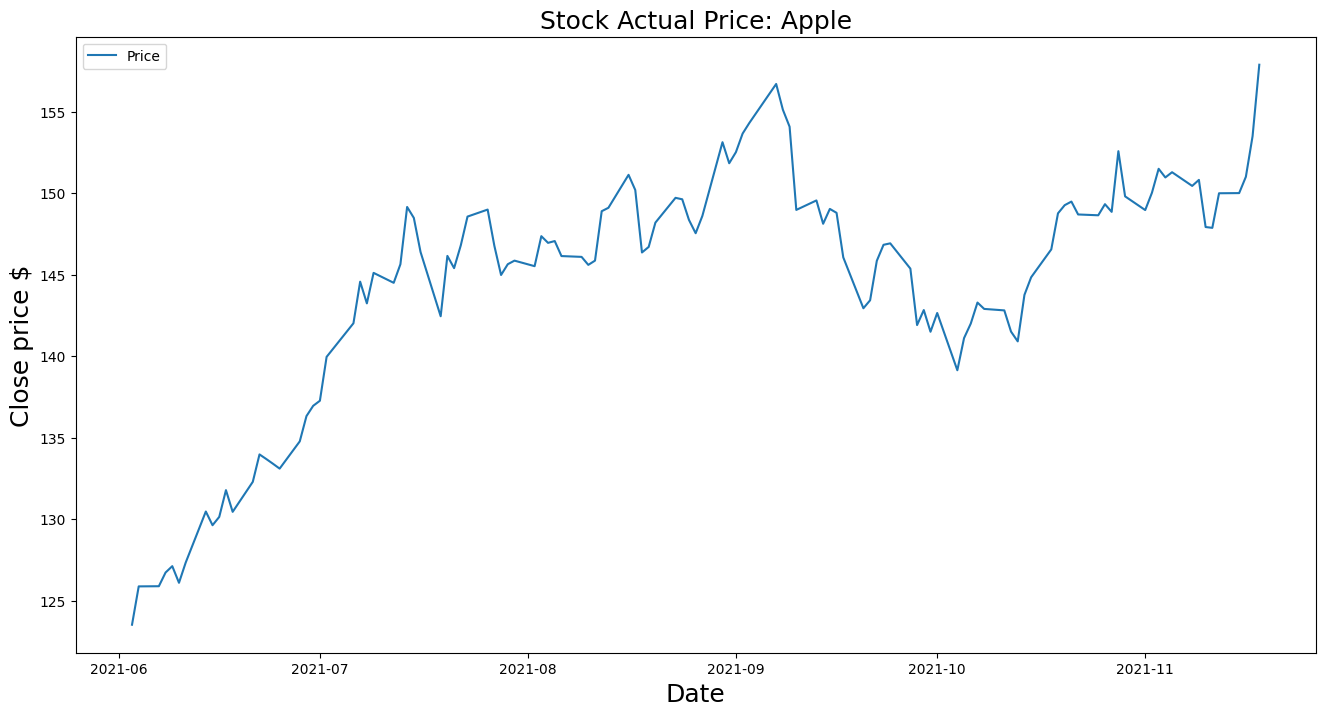

In [ ]:
plt.figure(figsize=(16,8))
# To display the price
plt.title('Stock Actual Price: Apple', fontsize=18)
plt.plot(data['Close'], label='Price')
plt.ylabel('Close price $', fontsize=18)
plt.xlabel('Date', fontsize=18)

# To give a legend
plt.legend()

# To display the graph
plt.show()

In [ ]:
# To create 20 days simple moving average column
data['SMA20'] = data['Close'].rolling(window=20, min_periods=1).mean()

# To create 60 days simple moving average column
data['SMA60'] = data['Close'].rolling(window=50, min_periods=1).mean()

# To create 20 days simple moving average column
data['SMA100'] = data['Close'].rolling(window=100, min_periods=1).mean()

# **To check NULL values**

In [ ]:
#To check NULL values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
SMA20        0
SMA60        0
SMA100       0
dtype: int64

# **To see the correlations between the data**

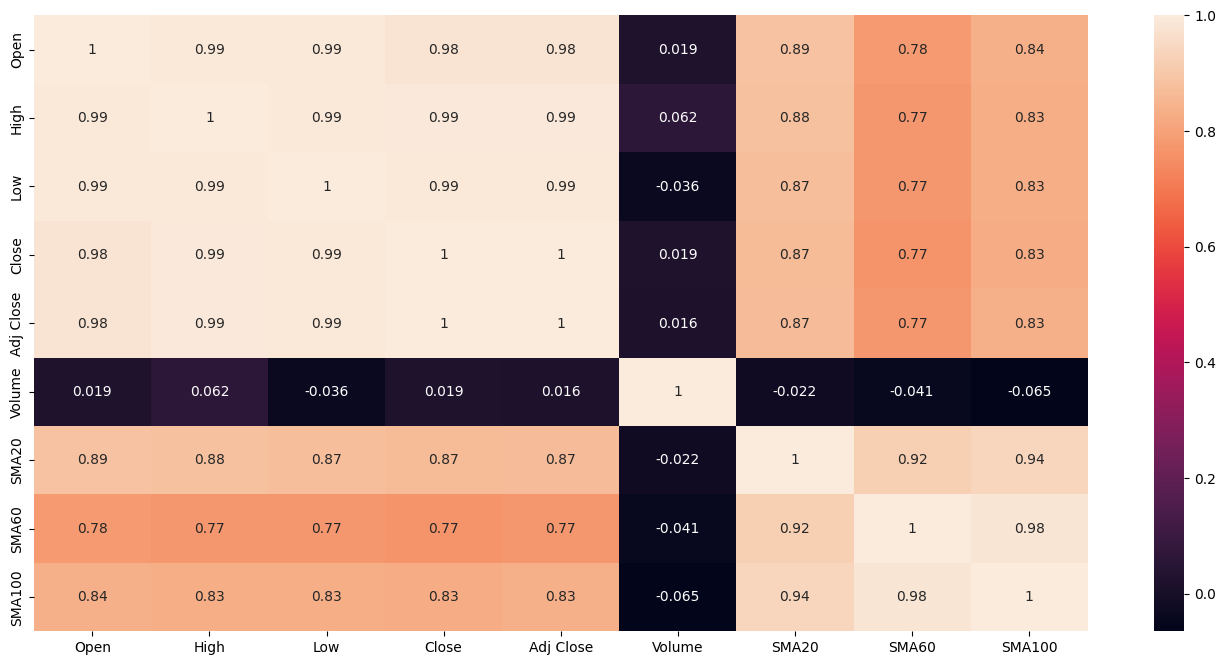

In [ ]:
#To see the correlations between the data
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['SMA20']]
y = data['Close']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

# Test set
print(X_test.describe())

# Training set
print(X_train.describe())

            SMA20
count   24.000000
mean   142.997123
std      7.570176
min    126.094285
25%    137.961126
50%    146.125249
75%    148.570126
max    150.787000
            SMA20
count   95.000000
mean   142.448609
std      8.156507
min    123.540001
25%    139.867751
50%    145.709499
75%    147.938000
max    150.809500


# **Linear Regression**

**Six months**

In [ ]:
print(len(data))
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
prediction = LR.predict(X_test)
print(LR.score(X_test,y_test))

119
0.41020594328100346


# **To measure the accuracy of the model**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))
print("Coefficient of Determination:", r2_score(y_test, prediction))

Mean Absolute Error: 3.713750267700695
Coefficient of Determination: 0.41020594328100346


**One year**

In [ ]:
# To create 20 days simple moving average column
df['SMA60'] = df['Close'].rolling(window=20, min_periods=1).mean()

print(len(df))
from sklearn.model_selection import train_test_split

X = df[['SMA60']]
y = df['Close']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)


251


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
prediction = LR.predict(X_test)
print(LR.score(X_test,y_test))

0.799923129240682


# **To measure the accuracy of the model**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))
print("Coefficient of Determination:", r2_score(y_test, prediction))

Mean Absolute Error: 3.74487612452478
Coefficient of Determination: 0.799923129240682


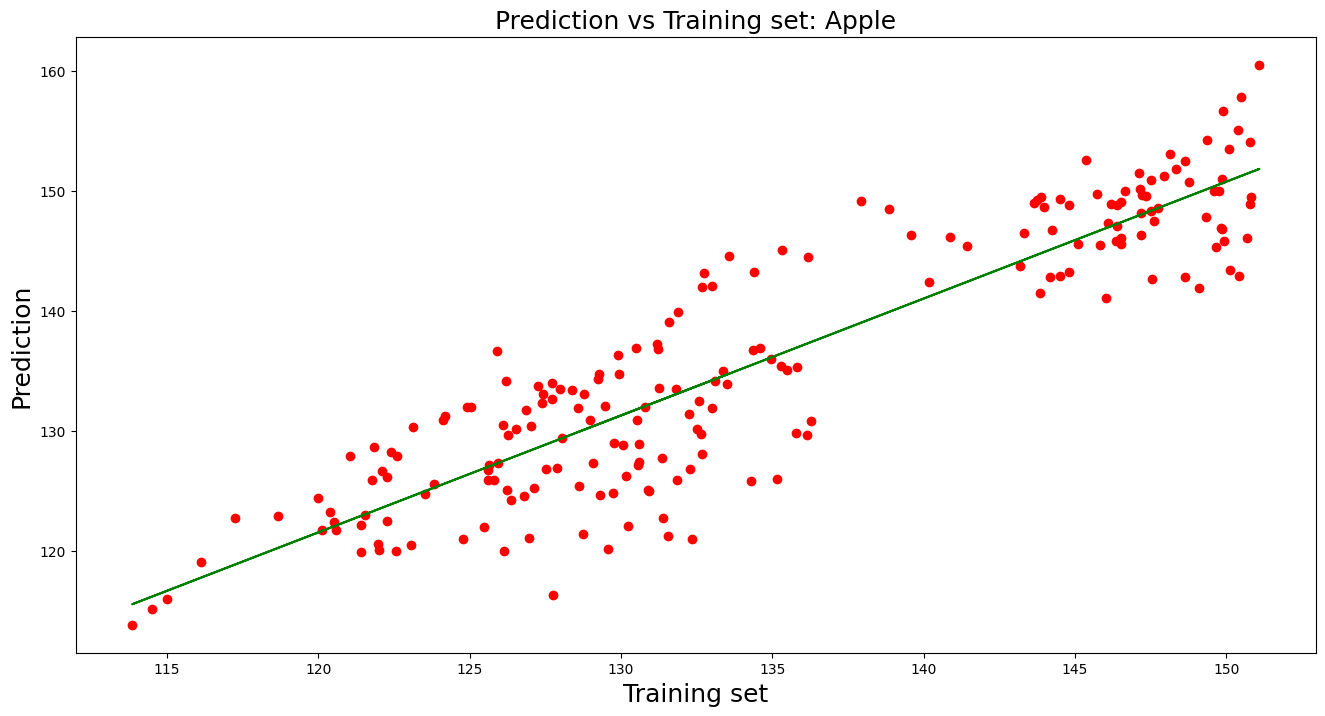

In [ ]:
# To display the graph
plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, LR.predict(X_train), color = "green")
plt.title("Prediction vs Training set: Apple", fontsize=18)
plt.xlabel("Training set", fontsize=18)
plt.ylabel("Prediction", fontsize=18)
plt.show()

# **Predicting  price in the future**

In [ ]:
# To get the data
dict = pd.read_csv("AAPL.csv")
data = pd.DataFrame(dict)

# To set the date column as an index
data = data.set_index('Date')

# To set the index into datetime
data = data.set_index(pd.DatetimeIndex(data.index.values))
data.head()

#data = data.tail(120)

data = data[['Close']]
# To create variable to predict 'X' days out into the feature
future_days = 50
data['Prediction'] = data[['Close']].shift(-future_days)

In [ ]:
# To create the feature data set (X) and convert it to a numpy array and remove the last the last 'X' days
X = np.array(data.drop(['Prediction'],1))[:-future_days]

# To create the target data set (y) and convert it to numpy array and get the target value except the last 'X' days
y = np.array(data['Prediction'])[:-future_days]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

<ipython-input-184-442c77a167cf>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['Prediction'],1))[:-future_days]


In [ ]:
# To Get the last 'X' rows of the feature data set
x_future = data.drop(['Prediction'],1)
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

<ipython-input-185-2b3bbb5cb32d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = data.drop(['Prediction'],1)


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
prediction = LR.predict(x_future)
print(LR.score(X_test,y_test))

0.28061375192665694


<ipython-input-187-246bff49e7f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


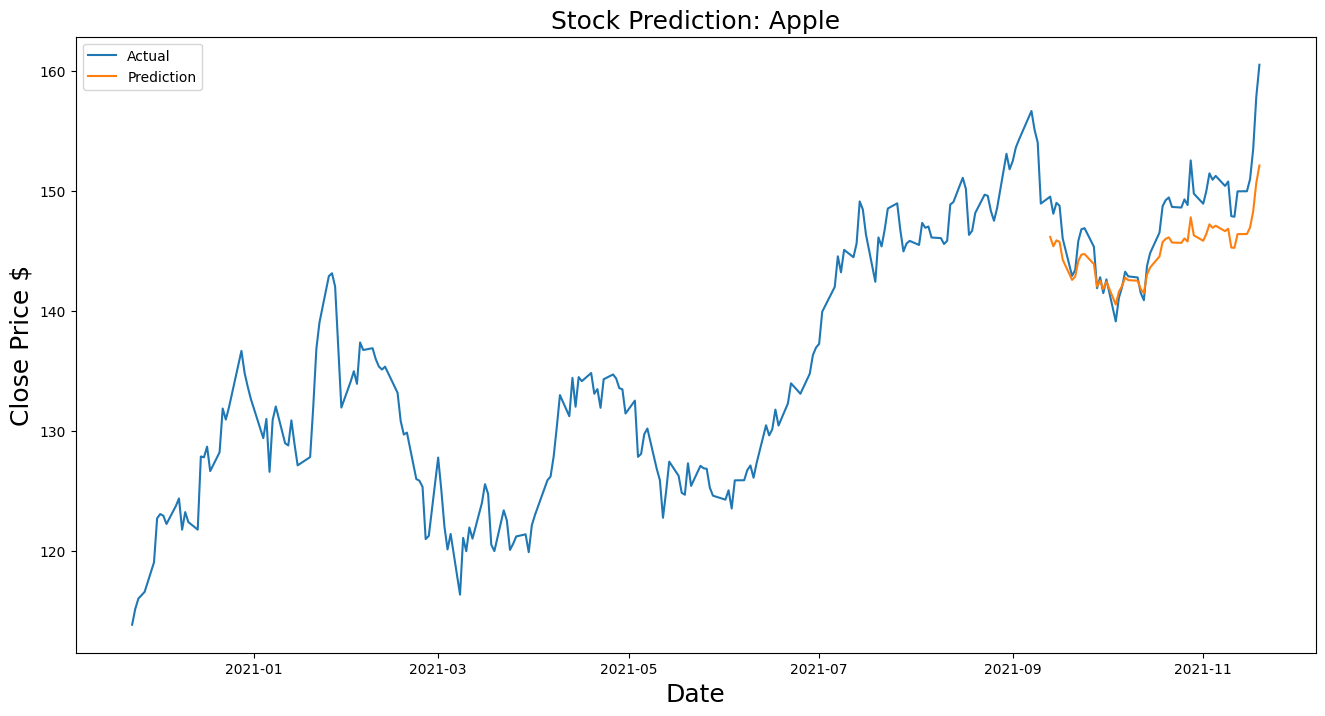

In [ ]:
Predictions = prediction
valid = data[X.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize=(16, 8))
plt.ylabel('Close Price $', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.plot(data['Close'])
plt.plot(valid[['Prediction']])
plt.title('Stock Prediction: Apple', fontsize=18)
plt.legend(['Actual', 'Prediction'])
plt.show()

# **LASSO Linear Regression**

In [ ]:
data = data.reset_index()
x = np.array(data.index).reshape(-1, 1)
y = data['Close']
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x,y)
prediction = lasso.predict(x)
data["prediction"] = prediction
print(lasso.score(x,y))

0.6201348905617754


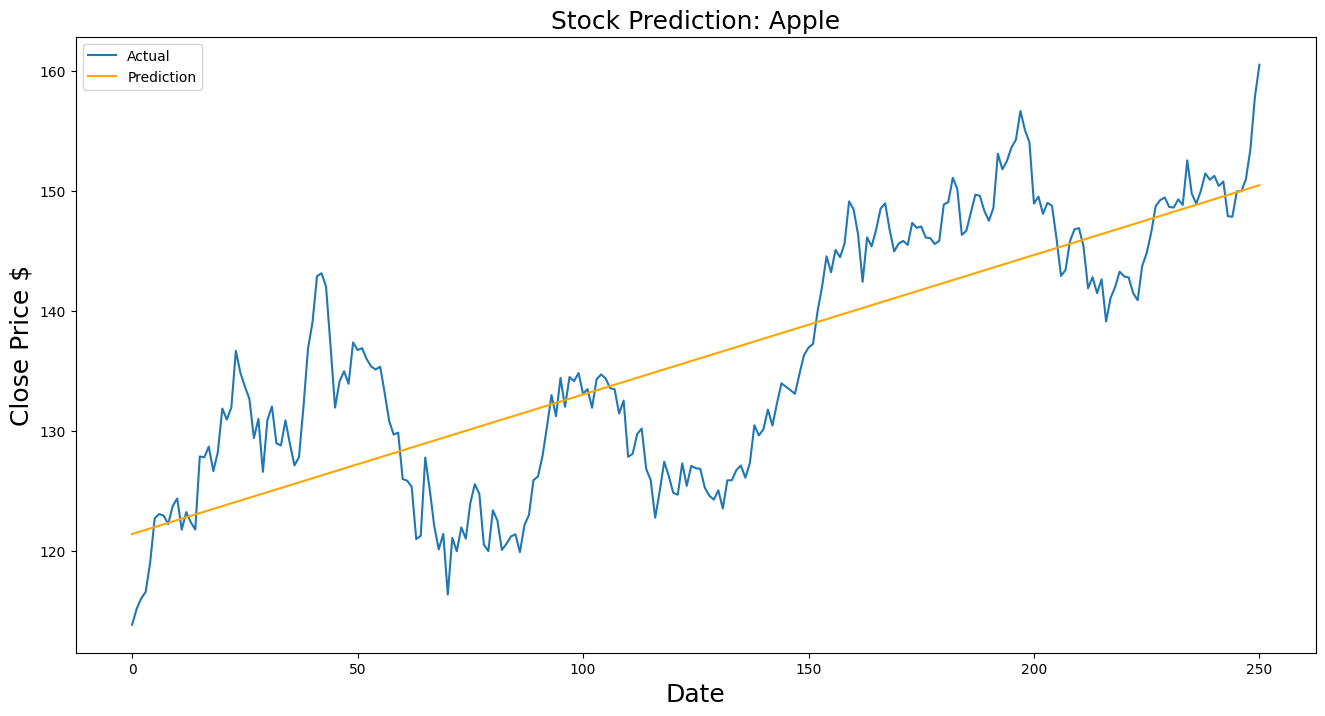

In [ ]:
# To display the graph
plt.figure(figsize=(16, 8))
plt.plot(data["Close"], label='Actual')
plt.plot(data.index, prediction,label='Prediction', color = 'orange')
plt.title('Stock Prediction: Apple', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend()
plt.show()

# **Support vector machine (SVM)**

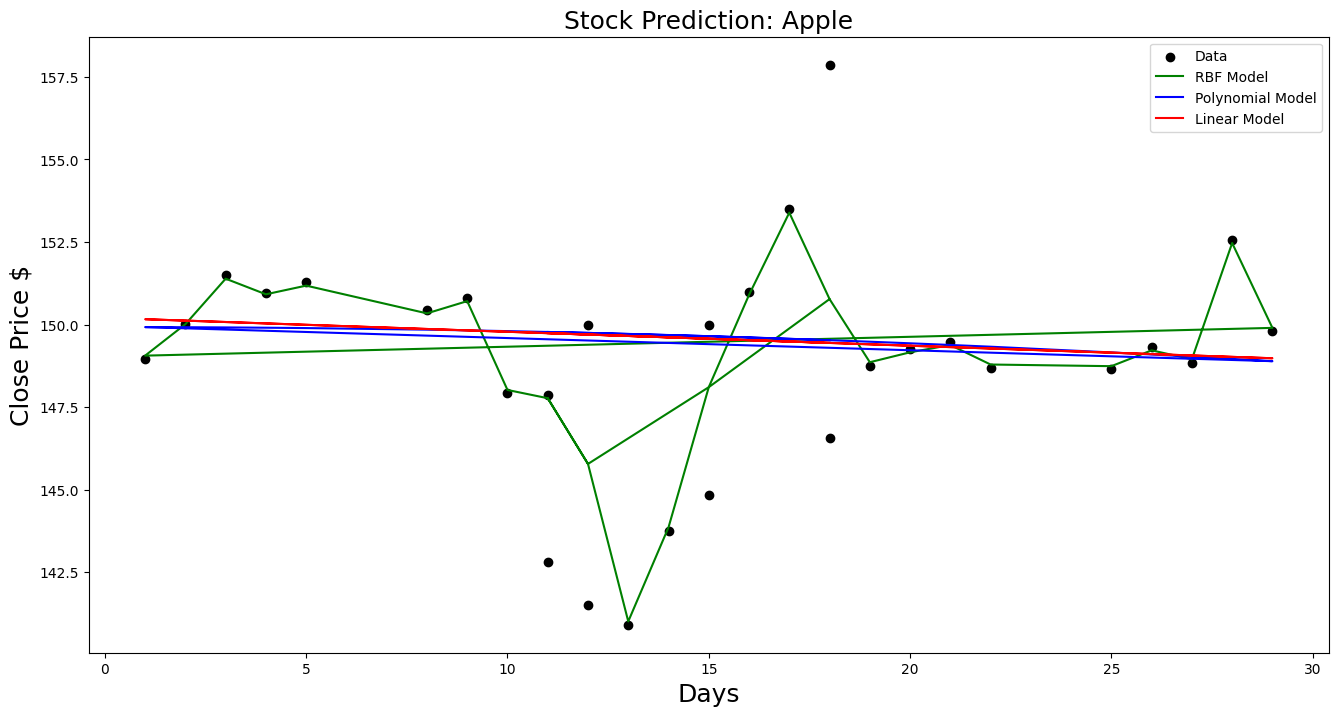

RBF Model [149.05949478]
Linear Model [150.16222672]
Polynmial Model [149.92361468]

 The actual price 250    160.550003
Name: Close, dtype: float64


In [ ]:
#Support vector machine (SVM)
from sklearn.svm import SVR

df = pd.read_csv("AAPL.csv")

df = df.tail(30)

# To store the data
actual_price = df.tail(1)

#print(actual_price)
data = data.tail(30)

# To get all the data except the last row
df = df.head(len(df)-1)

# Get only the dates and the close prices
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Close']


# Create empty lists
days = list()
adj_close_prices = list()


# To create an independent data set (dates)
for day in df_days:
    days.append([int(day.split('-')[2])])

# Create the dependent data set (Close prices)
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))


# To create three models
lin_svr = SVR(kernel='linear', C = 1000.0)
lin_svr.fit(days, adj_close_prices)

poly_svr = SVR(kernel='poly', C = 1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)

rbf_svr = SVR(kernel='rbf', C = 1000.0, gamma=0.85)
rbf_svr.fit(days, adj_close_prices)

# To show the three models
plt.figure(figsize=(16,8))
plt.title('Stock Prediction: Apple', fontsize=18)
plt.scatter(days, adj_close_prices, color = 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'blue', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'red', label = 'Linear Model')

plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.legend()
plt.show()

# To show the predicted price for a given day let's predict the last price which was in the last row
day = [[1]]
print('RBF Model', rbf_svr.predict(day))
print('Linear Model', lin_svr.predict(day))
print('Polynmial Model', poly_svr.predict(day))

# To show the actual price for that given day
print('\n The actual price', actual_price['Close'])


In [ ]:
# Plot the data
#train = data[:data]
#valid = data[data:]
#valid['Predictions'] = predictions
# Visualize the data
# plt.figure(figsize=(16,6))
# plt.title('Model')
#plt.xlabel('Date', fontsize=18)
#plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'])
# plt.plot(valid[['Close', 'Predictions']])
# plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
#plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Prediction
2021-09-13,149.550003,146.187536
2021-09-14,148.119995,145.413146
2021-09-15,149.029999,145.905939
2021-09-16,148.789993,145.775969
2021-09-17,146.059998,144.297599
2021-09-20,142.940002,142.608032
2021-09-21,143.429993,142.873376
2021-09-22,145.850006,144.183882
2021-09-23,146.830002,144.714578
2021-09-24,146.919998,144.763314
